## Lecture 2: Linear Regression in `sklearn` and (maybe) K-NN Regression
  

In [31]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from numpy import random
rng = random.default_rng(123)

## Simple Linear Regression

Our aim is to find the line that best fits these observations in the *least-squares sense*, as discussed in the last lecture.

Here's the function we made last time. 

In [32]:
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray):
    """
    Inputs:
    x_train: a (num observations by 1) array holding the values of the predictor variable
    y_train: a (num observations by 1) array holding the values of the response variable

    Returns:
    beta_vals:  a (num_features by 1) array holding the intercept and slope coeficients
    """
    
    # Check input array sizes
    if len(x_train.shape) < 2:
        print("Reshaping features array.")
        x_train = x_train.reshape(x_train.shape[0], 1)

    if len(y_train.shape) < 2:
        print("Reshaping observations array.")
        y_train = y_train.reshape(y_train.shape[0], 1)

    # first, compute means
    y_bar = np.mean(y_train)
    x_bar = np.mean(x_train)

    # build the two terms
    numerator = np.sum( (x_train - x_bar)*(y_train - y_bar) )
    denominator = np.sum((x_train - x_bar)**2)
    
    #slope beta1
    beta_1 = numerator/denominator

    #intercept beta0
    beta_0 = y_bar - beta_1*x_bar

    return np.array([beta_0,beta_1])

* Let's create data same as last time 

In [33]:
# Create some data
# x is an evenly space array of integers
x = np.arange(0, 20)

# y is some data with underlying relationship y = beta_1* x + beta_0
#  For this example, the true relation of the data is y = 2x + 5
true_beta_1 = 2
true_beta_0 = 5
ylinear = true_beta_1 * x + true_beta_0
noise_std = 20
# Add some noise to the y dimension
noise = rng.normal(0, noise_std, len(x)) 
#the noise is drawn from a normal distribution with mean 0 and standard deviation noise_std
y = ylinear + noise

* Use our function to estimate the least-squares fit to the line

In [34]:
betas = simple_linear_regression_fit(x,y) #Im using the original data
print(f" Estimated Slope: {betas[1]}")
print(f"Actual Slope: {true_beta_1}")
print(f" Estimated Intercept: {betas[0]}")
print(f"Actual Intercept: {true_beta_0}")

Reshaping features array.
Reshaping observations array.
 Estimated Slope: 2.140223217202967
Actual Slope: 2
 Estimated Intercept: 5.6836516333071
Actual Intercept: 5


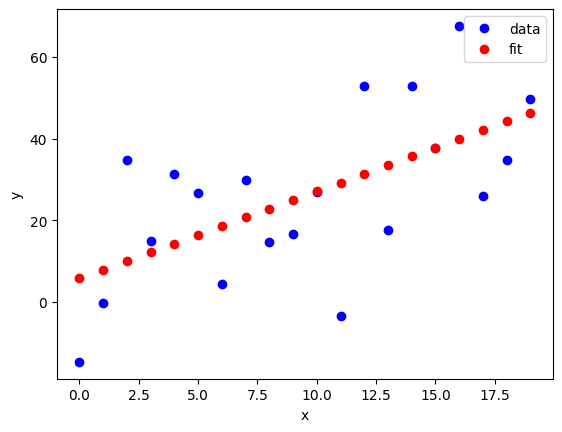

In [35]:
plt.figure()
plt.plot(x,y,'bo',label = 'data')
yfit = betas[0] + betas[1]*x
plt.plot(x,yfit,'ro',label = 'fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## Building a model with `sklearn`


In [36]:
from sklearn import linear_model
#I hate this,  All  the imports should be on the top. 

* fix x_train to be a column 
* this is kind of annoying Python "feature". 
* The default in scikit is is to work with data as columns.  

In [37]:
x_train = x.reshape(x.shape[0], 1)
y_train = y.reshape(y.shape[0], 1)

* There is a standardized structure to sklearn objects/methods.  Once you get the hang of it, you can use any new method the same way. 

In [38]:


# build the least squares model object
toyregr = linear_model.LinearRegression()
# use the fit methdod to fit the model. 
# save regression info (parameters, etc)
results = toyregr.fit(x_train, y_train)

beta0 = toyregr.intercept_
beta1 = toyregr.coef_[0]

print(beta0)
print(beta1)

[5.68365163]
[2.14022322]


In [39]:
best_fit = beta0 + beta1 * x_train

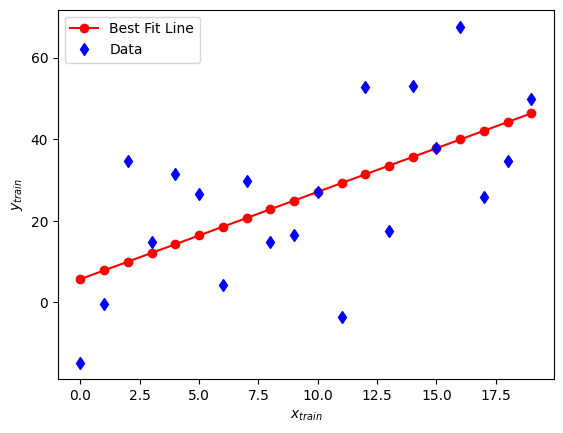

In [40]:

plt.figure()
ax = plt.axes()

ax.plot(x_train, best_fit,'ro-', label='Best Fit Line')
ax.plot(x_train, y_train,'bd', label='Data')

ax.set_xlabel(r'$x_{train}$')
ax.set_ylabel(r'$y_{train}$')
ax.legend()

### The structure of the `scikit-learn` library methods

For most standard models we will use the [scikit learn (sklearn)](https://scikit-learn.org/stable/index.html) module 

**General sklearn model fitting code-structure :**

*Define Model*

        model = sklearn_model_name(hyper_parameter1 = value1, hyper_parameter2 = value2....)

* This creates an object called `model`
* Every `model` has a list of hyperparameters that can be set using sklearn for the specific problem. 
* In practice it is advisable to **cross-validate** to tune the hyperparameters to find the model with the best prediction performance.

*Fit Model*

        model.fit(x_train, y_train)

* ```model.fit``` calculates the parameters of your model corresponding to the training data and hyperparameters you provided.

*Get Predictions*
#on training data 
y_prediction_train = model.predict(x_train)



*Evaluate Model*
r2_train = model.score(y_train, y_pred_train)
r2_test = model.score(y_test, y_pred_test)

* Evaluation of model can vary according to the task at hand i.e. Regression or Classification. For Regression, $R^2$ Score is a good starting point, while for Classification, Accuracy (%) is a good starting point.  
* In general, we always expect models to do well with training data.  (If they didnt we would just move on). The challenge is to get the model to work with test data.  


** Split Data into Train and Test Set **

* I introduced the term x_train and y_train rather than x and y.  
* In the last lecture, we discussed the idea that a meaningful way to understand our model is to test it on new data
* But, we usually don't have new data available, so what we can do is to **split the data into test and training sets.**  

        x_train, x_test, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

* The idea is we train the model on x_train, ytrain 

* We test the model on  x_test, y_test

 ``model.predict`` is the standard method called to make the model predict values for a specific X. 
 
 * Depending on if you feed x_train or x_test, you will get a y_prediction_train or y_prediction_test respectively.

        y_prediction_train = model.predict(x_train)
        y_prediction_test = model.predict(x_test)


![](../images/featurematrix.png)

<!--![](../images/sklearn2.jpg)-->

### Fuel Consumption Data Set 
We begin by loading up the `mtcars` dataset. This data was extracted from the 1974 Motor Trend US magazine, and comprises of fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). We will load this data to a dataframe with 32 observations on 11 (numeric) variables. Here is an explanation of the features:

- `mpg` is Miles/(US) gallon 
- `cyl` is Number of cylinders, 
- `disp` is	Displacement (cu.in.), 
- `hp` is	Gross horsepower, 
- `drat` is	Rear axle ratio, 
- `wt` is the Weight (1000 lbs), 
- `qsec` is 1/4 mile time,
- `vs` is Engine (0 = V-shaped, 1 = straight), 
- `am` is Transmission (0 = automatic, 1 = manual), 
- `gear` is the Number of forward gears, 
- `carb` is	Number of carburetors.

In [53]:
import pandas as pd
#load mtcars
dfcars = pd.read_csv("./data/mtcars.csv")
dfcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [42]:
dfcars.shape

(32, 12)

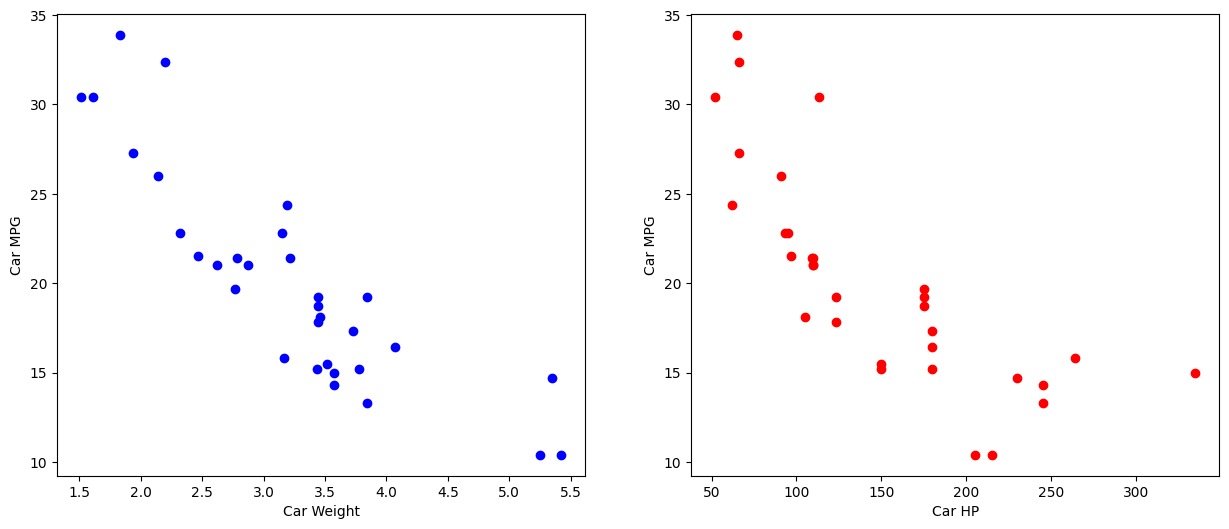

In [54]:
y_mpg = np.array(dfcars.mpg)
x_wt = np.array(dfcars.wt)
x_hp = np.array(dfcars.hp)
fig, ax = plt.subplots(1,2,figsize=(15,6))
ax[0].plot(x_wt, y_mpg,'bo')
ax[0].set_xlabel('Car Weight')
ax[0].set_ylabel('Car MPG')
ax[1].plot(x_hp, y_mpg,'ro')
ax[1].set_xlabel('Car HP')
ax[1].set_ylabel('Car MPG')
plt.show()

* Next, let's split the dataset into a training set and test set.
* There are two critical parameters here.  
    * `test_size` determines what fraction of the data should be set aside for the test set
    * `random_state` sets a seed in order to first shuffle the data and then split it. 
    * 
* this is cool.  I can directly split the data frame, and thus be able to have two separate data frames. 

In [44]:
# split into training set and testing set
from sklearn.model_selection import train_test_split

#set random_state to get the same split every time

traindf, testdf = train_test_split(dfcars, test_size=0.3, random_state=83)


In [45]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 9 to 18
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  22 non-null     object 
 1   mpg         22 non-null     float64
 2   cyl         22 non-null     int64  
 3   disp        22 non-null     float64
 4   hp          22 non-null     int64  
 5   drat        22 non-null     float64
 6   wt          22 non-null     float64
 7   qsec        22 non-null     float64
 8   vs          22 non-null     int64  
 9   am          22 non-null     int64  
 10  gear        22 non-null     int64  
 11  carb        22 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 2.2+ KB


Our **target** variable - `y` is mpg.   hp and wt are **predictors** - the `x` variable 

In [46]:
#Here is how to extract the numpy arrays from the training data frame.
mpg_train = np.array(traindf.mpg)
hp_train = np.array(traindf.hp)
wt_train = np.array(traindf.wt)
#do the stupid reshape to make regression function work. 
hp_train = hp_train.reshape(hp_train.shape[0], 1)
wt_train = wt_train.reshape(wt_train.shape[0], 1)

In [47]:
#here is how to extract the numpy arrays from the test data frame.
mpg_test = np.array(testdf.mpg)
hp_test = np.array(testdf.hp)
wt_test = np.array(testdf.wt)
#do the stupid reshape to make regression function work. 
hp_test = hp_test.reshape(hp_test.shape[0], 1)
wt_test = wt_test.reshape(wt_test.shape[0], 1)

In [48]:
from sklearn.linear_model import LinearRegression
#create linear model
lr_hp = LinearRegression()
#fit linear model for hp
lr_hp.fit(hp_train, mpg_train)
#predict the test data from hp
hp_pr_mpg = lr_hp.predict(hp_test)

### Model Evaluation using $R^2$ - proportion of variance accounted for by the model. 

* The predicted values of $y$ are $\hat{y}_i$ from each $x_i$ 

$$
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i, 

$$

* Then the equation for $R^2$ is 

$$ R^2
= 1 - \frac{\mathrm{SS}_{\mathrm{res}}}{\mathrm{SS}_{\mathrm{tot}}}
= 1 - \frac{\sum_{i=1}^{n} \bigl(y_i - \hat{y}_i\bigr)^2}{\sum_{i=1}^{n} \bigl(y_i - \bar{y}\bigr)^2},
$$

* Notice that the numerator is our error function that we minimized to get our least squares solution.  
* The denominator is the variance in the $y$ (without dividing by the number of samples) 


$$
\mathrm{SS}_{\mathrm{res}}
= \sum_{i=1}^{n} \bigl(y_i - \hat{y}_i \bigr)^2
= \sum_{i=1}^{n} \bigl(y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i)\bigr)^2,
$$

$$
\mathrm{SS}_{\mathrm{tot}}
= \sum_{i=1}^{n} \bigl(y_i - \bar{y} \bigr)^2,

$$

* $\bar{y}$ is just the mean.  

$$\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i $$

* Equivalently, a common form in the case of simple linear regression is 

$$
R^2
= \frac{\mathrm{Cov}(X,Y)^2}{\mathrm{Var}(X)\,\mathrm{Var}(Y)}
= \rho_{XY}^2,
$$

* where $\rho_{XY}$ is the correlation coefficient


In [58]:
# there is a function called score -- whatever the logical score would be 
# regression model - score is R^2
# horse powerrr

hp_test_r2 = lr_hp.score(hp_test, mpg_test)
hp_train_r2 = lr_hp.score(hp_train, mpg_train)
print('hp training R^2 = ' ,hp_train_r2)
print('hp test R^2 = ' ,hp_test_r2)

hp training R^2 =  0.605653885592825
hp test R^2 =  0.5786483221508159


In [57]:
# weight

lr_mpg = LinearRegression()  #create linear model
lr_mpg.fit(wt_train, mpg_train) #fit linear model for wt
wt_pr_mpg = lr_mpg.predict(wt_test) #predict mpg from wt for test data
wt_train_r2 = lr_mpg.score(wt_train, mpg_train) #compute R^2 for training data
wt_test_r2 = lr_mpg.score(wt_test, mpg_test) #compute R^2 for test data
print('wt training R^2 =' ,wt_train_r2) 
print('wt test R^2 =' ,wt_test_r2)

wt training R^2 = 0.7984919418023596
wt test R^2 = 0.5670679031203465


### Some preliminary thoughts:  
* Wt seems fit the mpg much better than horse power. 
    * $R^2$ in the training data is 0.80 for weight, while for horse power, $R^2$ in the training data is only 0.6   
* Both models predict new variables with about the same accuracy
    * $R^2$ in the training data is 0.57 for weight, while for horse power, $R^2$ in the test data is only 0.58 

Ideas to make it work better. 
Should we use a power law or exponential? 
Should we use both the variables?  

### Is a linear model robust?  
 * no... linear models struggle with outliers 
    * we need to detect and remove strange data as linear models are sensitive to these numbers


In [51]:

rng = np.random.default_rng(42)

n = 20
beta0_true = 1.0
beta1_true = 2.0
sigma = 0.7

# Generate 19 points
X_in = rng.normal(loc=0.0, scale=1.0, size=n-1)
eps_in = rng.normal(loc=0.0, scale=sigma, size=n-1)
y_in = beta0_true + beta1_true * X_in + eps_in

# Add one influential outlier (both high leverage in X and large vertical residual in y)
x_out = 5.0
y_out = beta0_true + beta1_true * x_out + 12.0  # big positive deviation to strongly pull the line

# Combine into full dataset
X = np.concatenate([X_in, [x_out]])
y = np.concatenate([y_in, [y_out]])



In [52]:
betas = simple_linear_regression_fit(X,y) #Im using the original data
print(f" Estimated Slope: {betas[1]}")
print(f"Actual Slope: {beta1_true}")
print(f" Estimated Intercept: {betas[0]}")
print(f"Actual Intercept: {beta0_true}")

Reshaping features array.
Reshaping observations array.
 Estimated Slope: 3.508894070433749
Actual Slope: 2.0
 Estimated Intercept: 1.3496630287049487
Actual Intercept: 1.0





* For a linear model with no intercept (centered data with means of 0) we can show that,

$$y_{i} = \beta x_{i} \rightarrow y_i = \sum_{j=1}^{n} a_{j,i} y_{j}$$


$$\beta = \dfrac{\sum_{j=1}^{n}x_jy_j}{\sum_{k=1}^{n}x_{k}^2}$$

$$ y_{i} = \dfrac{\sum_{j=1}^{n}x_jy_j}{\sum_{k=1}^{n}x_{k}^2} x_{i} $$

$$ y_{i}  = \sum_{j=1}^{n} \dfrac{x_{i}x_{j}}{\sum_{k=1}^{n}x^2_k} y_j $$


Therefore,

$$y_{i} = \sum_{j=1}^{n} a_{j,i} y_{j} $$

$$a_{j,i} = \dfrac{x_{j}}{\sum_{k=1}^{n}x^2_k} x_{i}$$


* This means a linear regression model is just a **weighted** average over the points observed.  
* That average is ALWAYS weighting points that are far away from the mean in x and y.  